# Numpy简介
- python标准库中的列表(list)可以当数组用，支持动态内存分配和垃圾收集，列表元素可以是任何对象，功能强大！
- 列表的缺点：
    1. 慢：循环时有各种下标检查和类型检查
    2. 占内存多：保存的是对象+指针
- NumPy的优点：
    1. 两大法宝：多维数组ndarray和通用函数ufunc
    2. 面向数值计算，速度快（内置函数逼近c语言）
- NumPy官方提供丰富的[中文资源](https://www.numpy.org.cn/)
- 如何使用Numpy等python第三方软件包？（如何开外挂？）
    1. 先导入再使用，没导入就没法用
    2. 如何导入？用import
    3. 被import的可以是通过conda或pip安装的包，也可以是python的path中（包括当前目录）的其它x.py文件。

In [1]:
# 导入用conda或者pip安装到python默认路径下的包
import numpy as np # 导入名为numpy的包，起个昵称叫np
# import numpy     # 导入名为numpy的包
# from numpy import array as ar   # 从numpy中导入array，起个昵称叫ar
# np = __import__("numpy") # 知道模块的名字就可以导入，这里使用的是import的函数形式 __import__(str) 注意双下划线

## 多维数组ndarray对象
- 多维数组ndarray（n-dimensional array object）是NumPy的核心对象
- 它存储单一类型的多维数组，注意与列表（list）的区别
- 结构简单，功能强大
- 使用优化过的C API，速度快
- 参考资料：
    - NumPy可以参考《python科学计算（第二版）》，该书使用python2.7，注意与3的区别（主要是print和unicode字符串）
    - 注意，python的版本问题，现在正值2.7与3.x交替的乱世！现有参考资料中有些沿用python2.7，有的用3.x。要注意分辨
    - 英语好的同学，建议直接学习numpy官方文档（英语不好的，建议补习英语！）

### ndarray对象：创建

In [8]:
# 给np.array()函数传递python序列对象
a=np.array([1,2,3,4])
b=np.array((5,6,7,8))
c=np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
print('a = ',a)
print('b = ',b)
print('c = ',c)

a =  [1 2 3 4]
b =  [5 6 7 8]
c =  [[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]


In [9]:
# 也可以用zeros, ones, empty和full函数，创建指定大小，值为0/1/空/指定数值的数组
zz=np.zeros((2,3,4))
oo=np.ones((2,3,4))
ee=np.empty((2,3,4))
ff=np.full((2,3,4),999)
print('zz = ', zz)
print('oo = ', oo)
print('ee = ', ee)
print('ff = ', ff)
# empty只分配内存，不赋值，最快。但是里面的内容是啥就不一定了！使用empty创建的ndarray，一定得初始化再使用。

zz =  [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
oo =  [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
ee =  [[[-2.68156159e+154 -2.68156159e+154  9.38724727e-323  0.00000000e+000]
  [ 2.12199579e-314  1.16097020e-028  3.93229337e-062  2.26233635e-076]
  [ 5.93966783e-038  5.01163173e+217  8.37170074e-144  1.51845213e-047]]

 [[ 1.38053435e-047  5.20764726e-090  6.09519899e+170  5.01163186e+217]
  [ 5.49419094e-143  9.80058441e+252  7.50189709e+247  1.35617292e+248]
  [ 4.65114471e-062  3.61006909e+174  2.57692763e-056  3.21443386e-057]]]
ff =  [[[999 999 999 999]
  [999 999 999 999]
  [999 999 999 999]]

 [[999 999 999 999]
  [999 999 999 999]
  [999 999 999 999]]]


In [10]:
# 创建形状类型与a相同的数组
za = np.zeros_like(a)
oa = np.ones_like(a)
ea = np.empty_like(a)
fa = np.full_like(a,999) 
print('za = ', za)
print('oa = ', oa)
print('ea = ', ea)
print('fa = ', fa)

za =  [0 0 0 0]
oa =  [1 1 1 1]
ea =  [-2305843009213693952        8788515799679      140616251998210
      689902448881459]
fa =  [999 999 999 999]


### ndarray对象：形状
- 数组对象的形状通过shape属性获得，返回一个描述数组各个轴的长度的元组(tuple)，元组的长度等于数组的维数
- 例如:
    - (3,4)，表示第0轴长度为3，第1轴长度为4（三行四列）
    - (2,3,4)表示第0轴长度为2，第1轴长度为3，第2轴长度为4
- 建议同学们使用**第X轴**的方式思考，0轴在最顶层，以此类推
- ndarray类型的对象里面，数据都是一维化之后存储在连续分配的内存中，ndarray的维度仅仅是告诉numpy如何读取而已
- 所以，可以通过改变shape属性，改变数组的形状。（注意和**转置**的区别！！！）

In [11]:
c = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[13,14,15,16],[17,18,19,20],[21,22,23,24]]])
print(c.shape)
print(c) # 2片，3行，4列（第0轴长度为2，第1轴长度为3，第2轴长度为4）

(2, 3, 4)
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


In [12]:
# 改变数组的形状
c.shape = (2,4,3) # 注意这不是转置！！！改变形状之后，数据的顺序是不变的。
print(c.shape)
print(c)

(2, 4, 3)
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]]


In [13]:
# 用-1表示这一个维度的长度是自动计算的
c.shape = 3,-1
print(c.shape)
print(c)

(3, 8)
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]]


In [14]:
# 使用reshape创建指定形状的新数组
d = c.reshape((2,3,4))
print('d.shape = ', d.shape)
print('d = ', d)
# c的形状不变
print('c.shape = ', c.shape)

d.shape =  (2, 3, 4)
d =  [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
c.shape =  (3, 8)


In [15]:
# 改变d的元素，c的元素仍会改变！
# 完全复制建议使用copy.deepcopy()
c[0,0] = 2233
print('c = ', c)
print('d = ', d)

c =  [[2233    2    3    4    5    6    7    8]
 [   9   10   11   12   13   14   15   16]
 [  17   18   19   20   21   22   23   24]]
d =  [[[2233    2    3    4]
  [   5    6    7    8]
  [   9   10   11   12]]

 [[  13   14   15   16]
  [  17   18   19   20]
  [  21   22   23   24]]]


### ndarray对象：类型
- 在读写地理数据时，ndarray的类型很**重要**！
- np数组如c语言一样有类型，通过dtype属性查看
- 创建数组时可以指定数据类型
- numpy支持的数据类型比python标准库支持的更加广泛

In [16]:
# 看看ndarray c的类型
print(c.dtype)

int64


In [17]:
# 创建array的默认数据类型是？
a = np.array([1,2,3,4])
print(a.dtype)
b = np.array([1.0, 2.0, 3.0, 4.0])
print(b.dtype)
c = np.zeros(4)
print(c.dtype)

int64
float64
float64


In [18]:
# 创建数组时指定数据类型
ai32 = np.array([1, 2, 3, 4], dtype=np.int32) 
af = np.array([1, 2, 3, 4], dtype=float)
ac = np.array([1, 2, 3, 4], dtype=complex) 
# 其中np.int32时numpy的数据类型；float和complex是python内置的类型，会自动转换为numpy的数据类型
print(ai32.dtype)
print(af.dtype)
print(ac.dtype)

int32
float64
complex128


In [19]:
# 用 set(np.typeDict.values()) 查看numpy支持的类型
set(np.typeDict.values()) 

{numpy.bool_,
 numpy.bytes_,
 numpy.complex128,
 numpy.complex256,
 numpy.complex64,
 numpy.datetime64,
 numpy.float128,
 numpy.float16,
 numpy.float32,
 numpy.float64,
 numpy.int16,
 numpy.int32,
 numpy.int64,
 numpy.int64,
 numpy.int8,
 numpy.object_,
 numpy.str_,
 numpy.timedelta64,
 numpy.uint16,
 numpy.uint32,
 numpy.uint64,
 numpy.uint64,
 numpy.uint8,
 numpy.void}

In [20]:
# 类型转换
# np.int16将数值转换为C中的int16型，行为与C语言中的对应类型一致
a=np.int16(200)
# 下面这句话会导致溢出，看看是什么么结果？
print(a*a)
# 数据强制转换为numpy对象后，由于还要套着python对象，运算速度慢，不建议单独使用！
# 对numpy的对象，使用numpy的内置功能才能提高速度

# "流浪地球"梗： 李家五兄弟 00 01 10 11 溢出 

-25536


/Users/gongwei/miniconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in short_scalars
  """


In [21]:
# 数组的类型转换
t1 = np.array([1, 2, 3, 4], dtype=np.float) 
t2 = np.array([1, 2, 3, 4], dtype=np.complex) 
t3 = t1.astype(np.int32)
t4 = t2.astype(np.complex64)
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

float64
complex128
int32
complex64


### ndarray对象：从数列创建
- np.arange()
    - 通过开始值、终值和步长来创建等差数列
    - np.arange(0, 1, 0.1)
    - 注意1不在数组中！
- np.linspace()
    - 通过开始值、终值和元素个数创建等差数列
    - np.linspace(0, 1, 10)
    - np.linspace(0, 1, 10, endpoint=False)
    - 可以通过endpoint参数指定是否包含终值，默认值为True，即包含终值
- np.logspace()
    - 通过开始值、终值和元素个数创建等比数列
    - np.logspace(0, 2, 5)
    - np.logspace(0, 1, 12, base=2, endpoint=False)
    - 可以通过base更改底数，默认为10
    - 可以通过endpoint参数指定是否包含终值，默认值为True

In [22]:
# 通过开始值、终值和步长来创建等差数列
np.arange(0, 1, 0.1) # 从0开始，到1结束，步长0.1，注意1不在数组中！

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [24]:
# 通过开始值、终值和元素个数创建等差数列
np.linspace(0, 1, 10) # 从0开始，到1结束，10个元素的等差数列
# np.linspace(0, 1, 10, endpoint=False) # 可以通过endpoint参数指定是否包含终值，默认值为True，即包含终值

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [29]:
# 通过开始值、终值和元素个数创建等比数列
# np.logspace(0, 2, 5) # 从0开始，到2结束，5个元素的等比数列
np.logspace(0, 1, 12, base=2, endpoint=False) # 可以通过base更改底数，默认为10
# 可以通过endpoint参数指定是否包含终值，默认值为True

array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863])

### ndarray对象：下标存取
- 下标方式：a[2]
- 切片方式：
    1. a[3:5] 包括a[3]但不包括a[5]
    2. a[:5] 从a[0]开始
    3. a[:-1] 用负数表示从后往前数
    4. a[1:-1:2] 第三个元素表示步长，每两个元素取一个
    5. a[::-1] 步长为负，整个数组顺序颠倒
    6. a[5:1:-2]步长为负时，开始下标必须大于结束下标
- 通过切片获取的数组是原数组的一个**“视图”**，与原数组**共享**同一存储空间,因此修改结果数组**会改变原始数组**

In [30]:
a = np.array([1,2,3,4,5,6,7])

In [31]:
a[2]

3

In [32]:
a[3:5]

array([4, 5])

In [33]:
a[:5]

array([1, 2, 3, 4, 5])

In [34]:
a[:-1]

array([1, 2, 3, 4, 5, 6])

In [35]:
a[1:-1:2]

array([2, 4, 6])

In [36]:
a[::-1]

array([7, 6, 5, 4, 3, 2, 1])

In [37]:
a[5:1:-2]

array([6, 4])

- 对多维数组，采用元组作为数组下标，逗号分隔
- 为了避免出现问题，请 “显式”地使用元组作为下标
- 整数元组/列表/数组，布尔数组作为下标
    - 多维数组的下标元组中，也可以使用整数元组或列表、整数数组和布尔数组
    - 当下标中使用这些对象时，所获得的数椐是原始数据的**副本**，因此修改结果数组**不会改变原始数组**。

In [40]:
x = np.arange(5,0,-1)
a = x[np.array([True, False, True, False, False])]
b = x[x>2]
c = x[[True, False, True, False, False]]
print('x = ', x)
print('a = ', a)
print('b = ', b)
print('c = ', c)

x =  [5 4 3 2 1]
a =  [5 3]
b =  [5 4 3]
c =  [5 3]


In [41]:
# 使用列表作为下标得到的数组不与原数组共享内存空间，对它的更改不反映到原数组上
b[0] = 2233
print('b = ', b)
print('x = ', x)
print('a = ', a)

b =  [2233    4    3]
x =  [5 4 3 2 1]
a =  [5 3]


- 如果下标元组中只包含**整数**和**切片**，那么得到的数组和原始数组**共享数据**，它是原数组的**视图**
- 如果下标元组中还包含**整数元组或列表、整数数组和布尔数组**，所获得的数椐是原始数据的**副本**，**不**与原始数组共享数据
- 提示：
    1. python中共享内存对象的情况非常普遍
    2. 用惯了c的，拿python数组都当指针好了
    3. 用惯了matlab的，记得用deepcopy

## ufunc函数
- ufunc是universal function的缩写，它是一种对数组的每个元素进行运算的函数
- NumPy内置的许多ufunc函数都是用c语言实现的，速度很快
    - x = np.linspace(0, 2*np.pi, 10) 
    - y = np.sin(x)
    - t = np.sin(x, out=x)
- NumPy的数组对象支持加减乘除等操作
    - 因为加减乘除操作在NumPy中使用ufunc实现，实际上是调用了ufunc

### ufunc的算术运算符/比较运算符
- 算术运算符：加减乘除乘方同余...
- 比较运算符：大于小于等于不等于...
- 数组对象支持操作符，极大的方便了程序编写。但是要注意如果算式很复杂、数组很大的时候，会产生过多的中间变量，降低程序运行速度。
- 可以适当考虑多用原位操作符，例如 x += y，复杂算式多分几行，减少对中间变量的内存分配

In [42]:
x1 = np.array([1,2,3,4])
x2 = np.array([5,6,7,8])

In [43]:
y = x1 + x2 # add
print(y)

[ 6  8 10 12]


In [44]:
y = x1 - x2 # subtract
print(y)

[-4 -4 -4 -4]


In [45]:
y = x1 * x2 # multiply
print(y)

[ 5 12 21 32]


In [46]:
y = x1 / x2 # divide
print(y)

[0.2        0.33333333 0.42857143 0.5       ]


In [47]:
y = x1 // x2 # floor divide
print(y)

[0 0 0 0]


In [48]:
y = -x1 # negative
print(y)

[-1 -2 -3 -4]


In [49]:
y = x1 ** x2 # power
print(y)

[    1    64  2187 65536]


In [50]:
y = x1 % x2 # remainder
print(y)

[1 2 3 4]


In [51]:
y += x1 # 原位操作符
print(y)

[2 4 6 8]


In [52]:
y = x1 == x2 # equal
print(y)

[False False False False]


In [53]:
y = x1 != x2 # not equal
print(y)

[ True  True  True  True]


In [54]:
y = x1 < x2 # less
print(y)

[ True  True  True  True]


In [55]:
y = x1 <= x2 # less_equal
print(y)

[ True  True  True  True]


In [56]:
y = x1 > x2 # greater
print(y)

[False False False False]


In [57]:
y = x1 >= x2 # greater_equal
print(y)

[False False False False]


### ufunc函数：自定义
- 使用frompyfunc(func, nin, nout) 
- 其中func是python函数，nin是func的输入参数个数，nout是func的返回值个数
- 如果ufunc输入参数有多个数组，形状不同，会自动进行广播操作
    1. 让所有输入数组都向其中维数最多的数组看齐，shape属性中不足的部分都通过在前面加1补齐
    2. 输出数组的shape属性是输入数组的shape属性的各个轴上的最大值
    3. 如果输入数组的某个轴的长度为1或与输出数组的对应轴的长度相同，这个数组能够用来计算，否则出错
    4. 当输入数组的某个轴的长度为1吋，沿着此轴运算时都用此轴上的第一组值!

In [58]:
# 自定义ufunc
def myfunc(x):
    return x**2 + 1
my_ufunc = np.frompyfunc(myfunc, 1, 1)
x = np.linspace(0,10,11)
y = my_ufunc(x)
print(y)

[1.0 2.0 5.0 10.0 17.0 26.0 37.0 50.0 65.0 82.0 101.0]


## Numpy常用函数
- numpy自带大量的函数，可以基本覆盖常见线性代数运算和随机数生成。配合更庞大的scipy，基本能够满足常见科学计算的需求。
- numpy和scipy配合，基本和matlab旗鼓相当。matlab速度上略胜一筹，但仍然不是很快。python胜在生态，包罗万象，语言本身的速度短板靠生态来补。
- python目前也有挑战者，比如开源的julia、Go、R，各有优势，但软件生态都不如python丰富。python永远开源的政策可以保证它的软件生态的发展。

### 随机数

In [59]:
import numpy as np
import matplotlib.pyplot as plt # 画图用matplotlib

(array([ 933., 1059., 1045.,  980., 1058., 1001., 1026.,  952.,  970.,
         976.]),
 array([1.50453721e-04, 1.00127413e-01, 2.00104372e-01, 3.00081331e-01,
        4.00058291e-01, 5.00035250e-01, 6.00012209e-01, 6.99989168e-01,
        7.99966128e-01, 8.99943087e-01, 9.99920046e-01]),
 <a list of 10 Patch objects>)

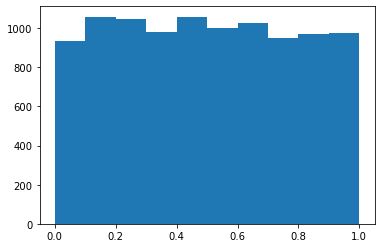

In [61]:
# 0到1之间的随机数
a = np.random.rand(10000)
plt.hist(a)
#plt.show()

(array([121.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 108.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 110.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  97.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 105.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 132.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 115.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        105.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.

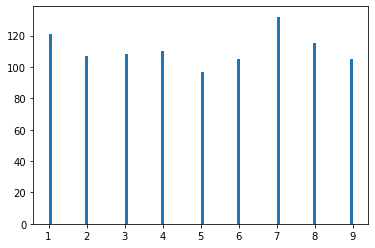

In [62]:
# 指定范围随机整数
a = np.random.randint(1,10,1000)
plt.hist(a,100)

(array([102.,  94., 109., 105.,  89., 120.,  96.,  96., 107., 110., 107.,
        105., 113., 103.,  97., 109.,  96., 103., 105., 101., 102., 100.,
        104.,  99.,  91.,  82.,  92., 112.,  83.,  97., 105.,  99., 117.,
        100., 103., 104.,  99.,  94., 102.,  83., 117.,  98.,  97., 103.,
        108., 102.,  85., 118., 102.,  81., 107., 113.,  96., 109., 106.,
         84.,  87., 109., 102., 104., 108., 108.,  86.,  85., 109.,  82.,
         98., 119.,  95., 102.,  92.,  99.,  95., 101., 113.,  92., 107.,
        111.,  96.,  99.,  89., 111.,  85.,  97., 103., 108.,  93., 101.,
         83.,  87., 123., 106., 107., 103.,  91.,  92.,  98.,  85.,  89.,
         89.]),
 array([1.0005014 , 1.09049289, 1.18048439, 1.27047589, 1.36046739,
        1.45045889, 1.54045039, 1.63044189, 1.72043338, 1.81042488,
        1.90041638, 1.99040788, 2.08039938, 2.17039088, 2.26038238,
        2.35037387, 2.44036537, 2.53035687, 2.62034837, 2.71033987,
        2.80033137, 2.89032286, 2.98031436, 3.

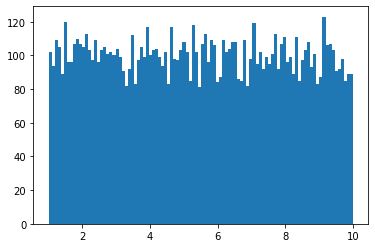

In [63]:
# 均匀分布随机浮点数
a = np.random.uniform(1,10,10000)
plt.hist(a,100)

In [69]:
# 随机排列
a = np.random.permutation(10)
print(a)

[6 2 0 4 1 9 8 5 3 7]


In [75]:
# 随机抽取
a = np.random.choice([1,2,3,4,'2233','张三','韩梅梅'])
print(a)

2233


In [76]:
# 标准正态分布随机数
a = 2.5 * np.random.randn(2, 4) + 3
print(a)

[[ 2.84376775 -6.25695144  4.5391187   1.92175662]
 [ 5.28209951  6.93316492  8.34480431  8.74342113]]


(array([  2.,   1.,   0.,   1.,   1.,   1.,   4.,   1.,   2.,   6.,   6.,
          3.,  12.,   9.,   8.,   8.,  11.,  19.,  24.,  15.,  30.,  38.,
         41.,  57.,  40.,  49.,  57.,  66., 111.,  89., 107., 109., 135.,
        124., 153., 165., 166., 168., 182., 213., 207., 244., 216., 298.,
        263., 262., 293., 294., 281., 272., 332., 271., 300., 305., 276.,
        278., 253., 262., 274., 239., 208., 192., 189., 184., 164., 143.,
        143., 130., 127., 109.,  92.,  81.,  92.,  64.,  61.,  58.,  55.,
         41.,  25.,  37.,  25.,  19.,  16.,  18.,  17.,  11.,   7.,   7.,
          4.,   9.,   5.,   5.,   4.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]), array([-10.53057495, -10.27255452, -10.01453409,  -9.75651365,
         -9.49849322,  -9.24047278,  -8.98245235,  -8.72443192,
         -8.46641148,  -8.20839105,  -7.95037061,  -7.69235018,
         -7.43432974,  -7.17630931,  -6.91828888,  -6.66026844,
         -6.40224801,  -6.14422757,  -5.88620714,  -5.62818671,

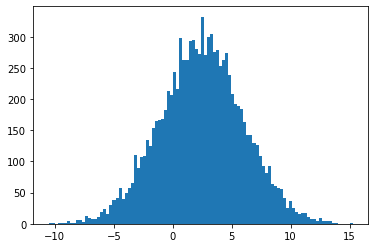

In [77]:
# 正态分布随机数
mu = 2.5
sigma = 3.5
a = np.random.normal(mu, sigma, 10000)
plt.hist(a,100)

(array([7.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.640e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.730e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.414e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.703e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.736e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.489e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.027e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.460e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.370e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.930e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 9.500e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

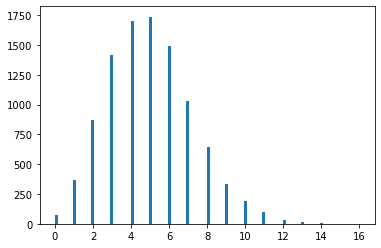

In [78]:
# 泊松分布随机数
a = np.random.poisson(5,10000)
plt.hist(a,100)

In [88]:
# 随机乱序洗牌
# 只接受一个参数，必须是numpy数组
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('original array: \n', a)
np.random.shuffle(a) 
print('shuffled array: \n', a)

original array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
shuffled array: 
 [[7 8 9]
 [4 5 6]
 [1 2 3]]


In [95]:
# 设置随机数种子
for i in range(10):
    np.random.seed(0)
    a = np.random.rand()
    print(a)

0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248
0.5488135039273248


### 求和求积、均值方差

In [96]:
a = np.arange(100)
b = a.reshape((5,20))
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [97]:
# 求和 python标准库
print(sum(a))
print(sum(b))

4950
[200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285
 290 295]


In [89]:
# 求和 numpy
print(np.sum(a))
print(np.sum(b))
print(np.sum(b,axis=0)) # 沿第0轴下标求和（变化第0轴下标，其它轴不变，放在一起求和）
print(np.sum(b,axis=1)) # 沿第1轴下标求和（变化第1轴下标，其它轴不变，放在一起求和）

4950
4950
[200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285
 290 295]
[ 190  590  990 1390 1790]


In [98]:
for i in range(5):
    s = 0.0
    for j in range(20):
        s += b[i,j]
    print(s)

190.0
590.0
990.0
1390.0
1790.0


In [99]:
c = a.reshape(2,5,10)
print(c)
print(c.shape)

[[[ 0  1  2  3  4  5  6  7  8  9]
  [10 11 12 13 14 15 16 17 18 19]
  [20 21 22 23 24 25 26 27 28 29]
  [30 31 32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47 48 49]]

 [[50 51 52 53 54 55 56 57 58 59]
  [60 61 62 63 64 65 66 67 68 69]
  [70 71 72 73 74 75 76 77 78 79]
  [80 81 82 83 84 85 86 87 88 89]
  [90 91 92 93 94 95 96 97 98 99]]]
(2, 5, 10)


In [100]:
print(np.sum(c,axis=0)) # 沿第0轴下标求和（变化第0轴下标，其它轴不变，放在一起求和）
print(np.sum(c,axis=1)) # 沿第1轴下标求和（变化第1轴下标，其它轴不变，放在一起求和）
print(np.sum(c,axis=2)) # 沿第2轴下标求和（变化第2轴下标，其它轴不变，放在一起求和）

[[ 50  52  54  56  58  60  62  64  66  68]
 [ 70  72  74  76  78  80  82  84  86  88]
 [ 90  92  94  96  98 100 102 104 106 108]
 [110 112 114 116 118 120 122 124 126 128]
 [130 132 134 136 138 140 142 144 146 148]]
[[100 105 110 115 120 125 130 135 140 145]
 [350 355 360 365 370 375 380 385 390 395]]
[[ 45 145 245 345 445]
 [545 645 745 845 945]]


In [101]:
# 连乘
print(np.product(c,axis=0)) # 沿第0轴下标连乘（变化第0轴下标，其它轴不变，放在一起连乘）
print(np.product(c,axis=1)) # 沿第1轴下标连乘（变化第1轴下标，其它轴不变，放在一起连乘）
print(np.product(c,axis=2)) # 沿第2轴下标连乘（变化第2轴下标，其它轴不变，放在一起连乘）

[[   0   51  104  159  216  275  336  399  464  531]
 [ 600  671  744  819  896  975 1056 1139 1224 1311]
 [1400 1491 1584 1679 1776 1875 1976 2079 2184 2291]
 [2400 2511 2624 2739 2856 2975 3096 3219 3344 3471]
 [3600 3731 3864 3999 4136 4275 4416 4559 4704 4851]]
[[         0     293601     709632    1272843    2010624    2953125
     4133376    5587407    7354368    9476649]
 [1512000000 1628113851 1751173632 1881483093 2019354624 2165109375
  2319077376 2481597657 2653018368 2833696899]]
[[                  0        335221286400      72684900288000
     2306992893004800   29820834418636800]
 [ 227991539359584000 1233909752121446400 5227941748053024000
     5769992716765184 1193853638847869952]]


In [102]:
# 加权平均
d = np.array([1,2,3,4,5])
w = np.array([0.1, 0.2, 0.5, 0.1, 0.3])
print(np.average(d, weights=w))

3.25


In [103]:
# 算术平均
print(np.mean(c,axis=0)) # 沿第0轴下标平均（变化第0轴下标，其它轴不变，放在一起平均）
print(np.mean(c,axis=1)) # 沿第1轴下标平均（变化第1轴下标，其它轴不变，放在一起平均）
print(np.mean(c,axis=2)) # 沿第2轴下标平均（变化第2轴下标，其它轴不变，放在一起平均）

[[25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
 [35. 36. 37. 38. 39. 40. 41. 42. 43. 44.]
 [45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]
 [55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
 [65. 66. 67. 68. 69. 70. 71. 72. 73. 74.]]
[[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]]
[[ 4.5 14.5 24.5 34.5 44.5]
 [54.5 64.5 74.5 84.5 94.5]]


In [104]:
# 方差
print(np.var(a))

833.25


In [105]:
# 标准差
print(np.std(a))

28.86607004772212


### 大小与排序

In [106]:
# 最小值
print(np.min(a,axis=0)) # 沿第0轴下标取最小值（变化第0轴下标，其它轴不变，放在一起取最小值）
print(np.min(b,axis=0)) # 沿第1轴下标取最小值（变化第1轴下标，其它轴不变，放在一起取最小值）
print(np.min(b,axis=1)) # 沿第1轴下标取最小值（变化第2轴下标，其它轴不变，放在一起取最小值）
print(np.min(c,axis=0)) # 沿第0轴下标取最小值（变化第0轴下标，其它轴不变，放在一起取最小值）
print(np.min(c,axis=1)) # 沿第1轴下标取最小值（变化第1轴下标，其它轴不变，放在一起取最小值）
print(np.min(c,axis=2)) # 沿第2轴下标取最小值（变化第2轴下标，其它轴不变，放在一起取最小值）

0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0 20 40 60 80]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [50 51 52 53 54 55 56 57 58 59]]
[[ 0 10 20 30 40]
 [50 60 70 80 90]]


In [107]:
# 最大值
print(np.max(a))

99


In [111]:
# 二元最小值
print(np.minimum(25,4))

4


In [127]:
# 二元最大值
print(np.maximum(25,4))

25


In [116]:
# 最大值的下标
print(np.argmax(a))

99


In [117]:
# 最小值的下标
print(np.argmin(a))

0


In [118]:
# 最大值与最小值之差
print(np.ptp(a))

99


In [120]:
# 转换一维数组和多维数组的下标
# numpy数组（array）中，所有的元素其实都是一维化后连续存储在内存里，所以numpy速度很快
# numpy的多维数组实际上是一种读取数组的方式，所有numpy数组实际上都被视作一维数组来操作，只不过这个过程被numpy隐藏了
# numpy提供的unravel_index函数可以将高维数组的坐标转化为一维数组的坐标，给用户提供numpy内部的数组访问方式
# 例如，在一个维度是(2,5,10)的三维数组中，第38号元素是哪一个呢？
print(np.unravel_index(38,(2,5,10)))
print(a[38])
print(c[0,3,8])

(0, 3, 8)
38
38


In [121]:
# c语言和fortran语言中，高维数组的排序方式不一样
# c语言中，第0轴在最外侧；fortran语言中，第0轴在最内侧
# python模仿c风格的排序，但你也可以指定为fortran风格，看看算出来的坐标是什么
print(np.unravel_index(38,(2,5,10),order='C'))
print(np.unravel_index(38,(2,5,10),order='F'))

(0, 3, 8)
(0, 4, 3)


In [122]:
# 排序
a = np.array([3,2,5,1,4,7,8,2])
print(np.sort(a))

[1 2 2 3 4 5 7 8]


In [123]:
# 返回排序下标
a = np.array([3,2,5,1,4,7,8,2])
idx = np.argsort(a)
print(idx)
print(a[idx])

[3 1 7 0 4 2 5 6]
[1 2 2 3 4 5 7 8]


In [124]:
# 多列扩展排序
# 先按数组a排序，如果a的元素一样，那就按b排序
a = np.array([1,5,1,4,3,4,4]) # First column
b = np.array([9,4,0,4,0,2,1]) # Second column
ind = np.lexsort((b,a)) # Sort by a, then by b
print(ind)
print(a[ind])
print(b[ind])

[2 0 4 6 5 3 1]
[1 1 3 4 4 4 5]
[0 9 0 1 2 4 4]


In [131]:
# 快速排序前k位
a = np.array([2,5,1,7,9,3,1,8,10])
print(np.partition(a,2)) # 只挑出前2名，放在开头，后面维持不变

[ 1  1  2  7  9  3  5  8 10]


In [132]:
# 返回快速排序前k位的下标
ind = np.argpartition(a,2)
print(ind)
print(a[ind])

[2 6 0 3 4 5 1 7 8]
[ 1  1  2  7  9  3  5  8 10]


In [133]:
# 中位数
print(np.median(a))

5.0


In [136]:
# 百分位数
a = np.random.randn(10000)
print(np.percentile(a,5))
print(np.percentile(a,50))
print(np.percentile(a,95))

-1.639030766837563
-0.005383402201001503
1.628590099726577


In [137]:
# 二分查找
# 从数组中找某一个元素在哪两个元素之间，返回下标
print(np.searchsorted([1,2,3,4,5,6], 2.5))
print(np.searchsorted([1,2,3,4,5,6], 2.5, side='right'))

2
2


### 多维数组操作

In [3]:
# 连接多个数组
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[10,11,12]])
c = np.concatenate((a,b))
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [8]:
# 数组分段
x = np.arange(9.0)
np.split(x, 3)

[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7., 8.])]

In [9]:
np.split(x, [3, 5, 6, 10])

[array([0., 1., 2.]),
 array([3., 4.]),
 array([5.]),
 array([6., 7., 8.]),
 array([], dtype=float64)]

In [10]:
# 沿第1轴连接数组（横向拼接）
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[10,11,12]])
c = np.hstack((a,b))
print(c)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [11]:
# 沿第0轴连接数组（纵向拼接）
c = np.vstack((a,b))
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [12]:
# 按列拼接多个一维数组
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
d = np.column_stack((a,b,c))
print(d)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [13]:
#交换两个轴的顺序
a = np.array([[1,2,3],[4,5,6]])
print(np.swapaxes(a,0,1))

[[1 4]
 [2 5]
 [3 6]]


In [14]:
#转置
print(a.T)
print(a.transpose())

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


### 基本线性代数

In [15]:
# 矩阵相乘
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[10,11,12]])
print(np.dot(a,b.T))

[[ 50  68]
 [122 167]]


In [16]:
# 外积
print(np.outer(a,b.T))

[[ 7 10  8 11  9 12]
 [14 20 16 22 18 24]
 [21 30 24 33 27 36]
 [28 40 32 44 36 48]
 [35 50 40 55 45 60]
 [42 60 48 66 54 72]]


In [17]:
# 内积
print(np.inner(a,b))

[[ 50  68]
 [122 167]]


In [18]:
# 张量乘积
print(np.tensordot(a,b))

217


In [19]:
# 解方程Ax=b
A = np.array([[3,1],[1,2]])
b = np.array([9,8])
x = np.linalg.solve(A,b)
print(x)

[2. 3.]


0.9999999999999999 -0.9499999999999997


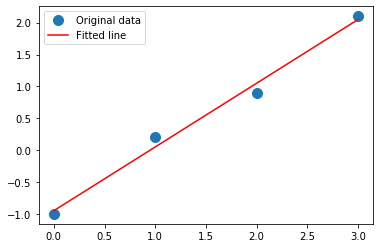

In [3]:
# 求最小二乘解
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [207]:
help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
        For the pur

In [4]:
# 求行列式
A = np.array([[1,2],[3,4]])
print(np.linalg.det(A))

-2.0000000000000004


In [5]:
# 求特征值和特征向量
print(np.linalg.eig(A))

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


In [6]:
# 求条件数
print(np.linalg.cond(A))

14.933034373659268


In [7]:
# 求范数
print(np.linalg.norm(A))

5.477225575051661


In [8]:
# 求迹
print(np.trace(A))

5


In [9]:
# cholesky分解
print(np.linalg.cholesky(np.dot(A,A.T)))

[[2.23606798 0.        ]
 [4.91934955 0.89442719]]


In [10]:
# QR分解
print(np.linalg.qr(A))

(array([[-0.31622777, -0.9486833 ],
       [-0.9486833 ,  0.31622777]]), array([[-3.16227766, -4.42718872],
       [ 0.        , -0.63245553]]))


In [11]:
# SVD分解
print(np.linalg.svd(np.dot(A,A.T)))

(array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]]), array([29.86606875,  0.13393125]), array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]]))


In [12]:
# 求逆
print(np.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [222]:
# 求伪逆
print(np.linalg.pinv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]
